# Weight of Evidence

This example was validated unsing the example from the explanations provided by *Sundar Krishna* about Weight of Evidence ([Example and full explanation can be found here](https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb).

For easy reference, Sundar Example is illustrated here:

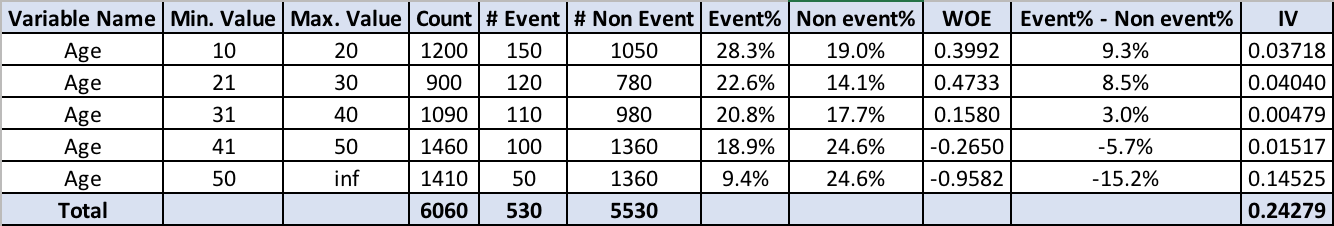
<h1><center>**Figure 2: Output of the code (final_iv)**</center></h1>

In Sundar example he showed how to calculate the **weight of evidence** of the features `age` with respect of an other feature whose values are: `Event` and `Not Event`. 

Reproducing the same dataset used in the example:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

X = pd.DataFrame({
    'age': (
        [20] * 1200
    ) + (
        [30] * 900
    ) + (
        [40] * 1090
    ) + (
        [50] * 1460
    ) + (
        [60] * 1410
    )
})

y = pd.Series(
    (['Event'] * 150) + (['No Event'] * 1050) + \
    (['Event'] * 120) + (['No Event'] * 780) + \
    (['Event'] * 110) + (['No Event'] * 980) + \
    (['Event'] * 100) + (['No Event'] * 1360) + \
    (['Event'] * 50) + (['No Event'] * 1360))

print("Sample of the feature: age and the Binary feature 'Event' vs 'No Event'")
pd.concat([X, y], axis=1).sample(10)

Sample of the feature: age and the Binary feature 'Event' vs 'No Event'


,age,0
1615,30,No Event
5817,60,No Event
2165,40,Event
4412,50,No Event
4321,50,No Event
2008,30,No Event
2796,40,No Event
2741,40,No Event
1322,30,No Event
3652,50,No Event


Below can be found the age distribution, which matches table **Figure2: Output of the code (final_iv)** of the original example.

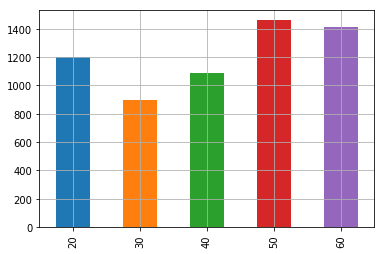

In [2]:
X['age'].value_counts().sort_index().plot(
    kind='bar', grid=True);

Total of `Events` and `No Events`

In [3]:
y.value_counts()

No Event    5530
Event        530
dtype: int64

In our implementation, we **strictly transform** only the columns of type `object` of a `pandas.DataFrame`. 

### BE AWARE

**Internaly, our implementation ensures that the `object` column solely contains `str` types** forcing everythin on the column to become a `str`. To avoid misleading results (like dealing with nans) transform the desired columns to `str` before using our implementation, like below:

In [4]:
X['age'] = X['age'].astype(str)

Also, the binary for which we compute the *weight-of-evidence*, in this example the feature containing the `Event` and `No Event`, must be encoded with the values `{0, 1}`:

In [5]:
y = (y == 'No Event').astype(int)

# Fitting WOES

In [6]:
from common import weight_of_evidence

woe_scaler = weight_of_evidence.WOE(
    min_freq=2,
    low_freq_value='WOE_OTHER',
    log_scale=True
)
woe_scaler.fit(X, y)

In [7]:
# List the features transformed to WOE
woe_scaler.categ_features_

Index(['age'], dtype='object')

In [8]:
# The actual values of WOE, which match FIG. 2
woe_scaler.woe_

{'age': {'20': 0.3991559389148996,
  '30': 0.4732639110686216,
  '40': 0.15799388209801163,
  '50': -0.26500370477179325,
  '60': -0.9581508853317385}}

**Note**: if the `woe_scaler.woe_` `dict` gets updated then the woe_scaler.transform() will blindly change the respective WOE to the updated value

In [9]:
X = woe_scaler.transform(X)
X.sample(10)

,age
2094,0.473264
5496,-0.958151
5596,-0.958151
5016,-0.958151
3216,-0.265004
2838,0.157994
490,0.399156
1273,0.473264
1305,0.473264
210,0.399156
